
## **Creating a K-Means Clustering Algorithm**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt

In [ ]:
houseData= pd.read_csv('DMV302_Assessment_2_HouseholdWealth.csv',)
houseData

,household_total_assets,annual_household_income
0,1230531,15724
1,4877446,124751
2,4430878,124372
3,1954751,179311
4,2179963,56355
...,...,...
995,4006949,253042
996,3816007,32384
997,985874,196997
998,482927,35603


In [ ]:
df

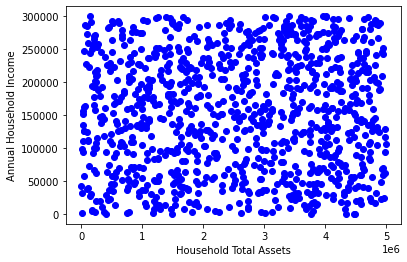

In [ ]:
X=houseData[["household_total_assets","annual_household_income"]]
plt.scatter(X["household_total_assets"], X["annual_household_income"],c="blue")
plt.xlabel("Household Total Assets")
plt.ylabel("Annual Household Income")
plt.show()

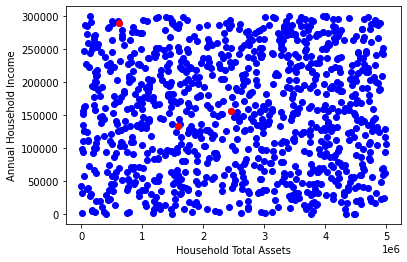

In [ ]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(X["household_total_assets"], X["annual_household_income"], c="blue")
plt.scatter(Centroids["household_total_assets"], Centroids["annual_household_income"], c="red")
plt.xlabel("Household Total Assets")
plt.ylabel("Annual Household Income")
plt.show()

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["household_total_assets"]-row_d["household_total_assets"])**2
            d2 = (row_c["annual_household_income"]-row_d["annual_household_income"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["annual_household_income", "household_total_assets"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['annual_household_income'] - Centroids['annual_household_income']).sum() + (Centroids_new['household_total_assets'] - Centroids['household_total_assets']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["annual_household_income","household_total_assets"]]

374083.0500869431
331634.3007675089
226552.94912864748
208674.7137548359
127267.14301154323
82864.39518506997
102424.88087851967
81869.26800357987
30827.941971786873
20575.745712263713
26014.590416946652
15512.839115182607
5229.127731075423
0.0


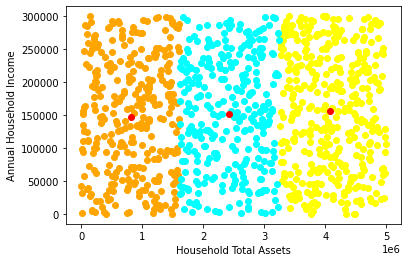

In [ ]:
color=['orange','yellow','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["household_total_assets"],data["annual_household_income"],c=color[k])
plt.scatter(Centroids["household_total_assets"],Centroids["annual_household_income"],c='red')
plt.xlabel('Household Total Assets')
plt.ylabel('Annual Household Income')
plt.show()

# Creating a Multi layered NN

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/AtRiskStudentsTraining.csv') 
print(df.shape)
df.describe().transpose()

(1000, 5)


,count,mean,std,min,25%,50%,75%,max
GPA,1000.0,2.02778,1.151075,0.0,1.03,2.05,3.01,4.0
attendance,1000.0,49.56400,29.000292,0.0,24.00,48.50,75.00,100.0
duration,1000.0,4963.71400,2878.833669,4.0,2516.75,4760.00,7433.75,9970.0
language,1000.0,49.90500,29.053469,0.0,25.75,50.50,74.00,100.0
at-risk,1000.0,0.48700,0.500081,0.0,0.00,0.00,1.00,1.0


In [ ]:
target_column = ['at-risk'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GPA,1000.0,0.506945,0.287769,0.000000,0.257500,0.512500,0.752500,1.0
attendance,1000.0,0.495640,0.290003,0.000000,0.240000,0.485000,0.750000,1.0
duration,1000.0,0.497865,0.288750,0.000401,0.252432,0.477432,0.745612,1.0
language,1000.0,0.499050,0.290535,0.000000,0.257500,0.505000,0.740000,1.0
at-risk,1000.0,0.487000,0.500081,0.000000,0.000000,0.000000,1.000000,1.0


In [ ]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(700, 4)
(300, 4)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[189 169]
 [147 195]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       358
           1       0.54      0.57      0.55       342

    accuracy                           0.55       700
   macro avg       0.55      0.55      0.55       700
weighted avg       0.55      0.55      0.55       700



In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[88 67]
 [49 96]]
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       155
           1       0.59      0.66      0.62       145

    accuracy                           0.61       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.62      0.61      0.61       300



In [ ]:
df = pd.read_csv('/content/AtRiskStudentsTraining.csv')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GPA,1000.0,2.02778,1.151075,0.0,1.03,2.05,3.01,4.0
attendance,1000.0,49.56400,29.000292,0.0,24.00,48.50,75.00,100.0
duration,1000.0,4963.71400,2878.833669,4.0,2516.75,4760.00,7433.75,9970.0
language,1000.0,49.90500,29.053469,0.0,25.75,50.50,74.00,100.0
at-risk,1000.0,0.48700,0.500081,0.0,0.00,0.00,1.00,1.0


In [ ]:
target_column = ['at-risk'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GPA,1000.0,0.506945,0.287769,0.000000,0.257500,0.512500,0.752500,1.0
attendance,1000.0,0.495640,0.290003,0.000000,0.240000,0.485000,0.750000,1.0
duration,1000.0,0.497865,0.288750,0.000401,0.252432,0.477432,0.745612,1.0
language,1000.0,0.499050,0.290535,0.000000,0.257500,0.505000,0.740000,1.0
at-risk,1000.0,0.487000,0.500081,0.000000,0.000000,0.000000,1.000000,1.0


In [ ]:
print(math.erf(0.506945))
print(math.erf(0.495640))
print(math.erf(0.497865))
print(math.erf(0.499050))
print(math.erf(0.487000))

0.5265817810165464
0.516660045321567
0.51862167559182
0.5196646379381425
0.5090017741658318


In [ ]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(700, 4)
(300, 4)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[205 153]
 [173 169]]
              precision    recall  f1-score   support

           0       0.54      0.57      0.56       358
           1       0.52      0.49      0.51       342

    accuracy                           0.53       700
   macro avg       0.53      0.53      0.53       700
weighted avg       0.53      0.53      0.53       700



In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[92 63]
 [64 81]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       155
           1       0.56      0.56      0.56       145

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



The math error fuction of the mean are 0.5265817810165464,
0.516660045321567,
0.51862167559182,
0.5196646379381425 and
0.5090017741658318.


# An Association Analysis of Shopping Transactions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df=pd.read_csv('/content/shoppingtransactions.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Transactions'] = df[df.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [ ]:
df.drop(df.columns[0:20], axis=1, inplace=True)
df.head()

,Transactions
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [ ]:
transcactions = list(df['Transactions'].apply(lambda x: sorted(x.split(','))))
encoder = TransactionEncoder().fit(transcactions)
onehot = encoder.transform(transcactions)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
17246,"(honey, fresh tuna)",(fromage blanc),0.003999,0.013598,0.001600,0.400000,29.415686,0.001545,1.644003,2
12622,"(cookies, low fat yogurt)",(shallot),0.005333,0.007732,0.001200,0.225000,29.098707,0.001159,1.280345,2
15565,"(escalope, mushroom cream sauce)",(pasta),0.005733,0.015731,0.002533,0.441860,28.088096,0.002443,1.763482,2
15564,"(escalope, pasta)",(mushroom cream sauce),0.005866,0.019064,0.002533,0.431818,22.650826,0.002421,1.726447,2
17244,"(fromage blanc, honey)",(fresh tuna),0.003333,0.022264,0.001600,0.480000,21.559760,0.001526,1.880262,2
16620,"(french fries, pasta)",(mushroom cream sauce),0.003066,0.019064,0.001067,0.347826,18.245059,0.001008,1.504102,2
12275,"(red wine, chocolate)",(tomato sauce),0.004933,0.014131,0.001067,0.216216,15.300357,0.000997,1.257832,2
16621,"(french fries, mushroom cream sauce)",(pasta),0.004666,0.015731,0.001067,0.228571,14.529782,0.000993,1.275904,2
17245,"(fromage blanc, fresh tuna)",(honey),0.002400,0.047460,0.001600,0.666667,14.046816,0.001486,2.857619,2
13968,"(honey, eggs)",(fromage blanc),0.005733,0.013598,0.001067,0.186047,13.681715,0.000989,1.211865,2
